<a href="https://colab.research.google.com/github/chaurasia-aditya/CaptchaTheBots/blob/main/Resnet101_noise_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from fastai.vision.all import *
import shutil
import os
!pip install py7zr
from py7zr import unpack_7zarchive
from PIL import Image as im
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
label_names = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck',
}

<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-4-bc99a1d9d01d>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 0:


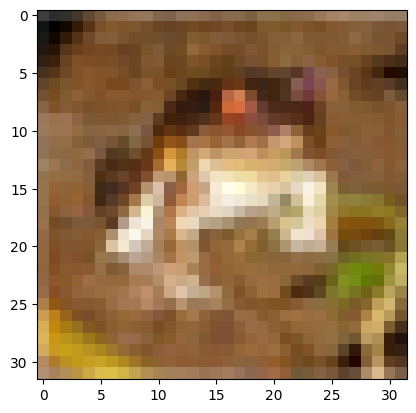

cifar10_dataset/train/frog/0.png


In [ ]:
import os
from tensorflow import keras
# Create directories for train and test sets
os.makedirs('cifar10_dataset/train', exist_ok=True)
os.makedirs('cifar10_dataset/test', exist_ok=True)

parent_path_train = "cifar10_dataset/train"
parent_path_valid = "cifar10_dataset/test"

# Organize train images into folders based on labels
for i in range(len(train_images)):
    label = label_names[train_labels[i][0]]
    os.makedirs(f'cifar10_dataset/train/{label}', exist_ok=True)
#     image_filename = f'cifar10_dataset/train/{label}/train_{i}.png'
    image_filename = f'cifar10_dataset/train/{label}/{i}.png'
    if i is 0:
        plt.imshow(train_images[i])
        plt.show()
        print(image_filename)
    keras.preprocessing.image.save_img(image_filename, train_images[i])

# Organize test images into folders based on labels
for i in range(len(test_images)):
    label = label_names[test_labels[i][0]]
    os.makedirs(f'cifar10_dataset/test/{label}', exist_ok=True)
#     image_filename = f'cifar10_dataset/test/{label}/test_{i}.png'
    image_filename = f'cifar10_dataset/test/{label}/{i}.png'
    keras.preprocessing.image.save_img(image_filename, test_images[i])

# Base

In [ ]:
batch_tfms = [*aug_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75), Normalize.from_stats(*imagenet_stats)]

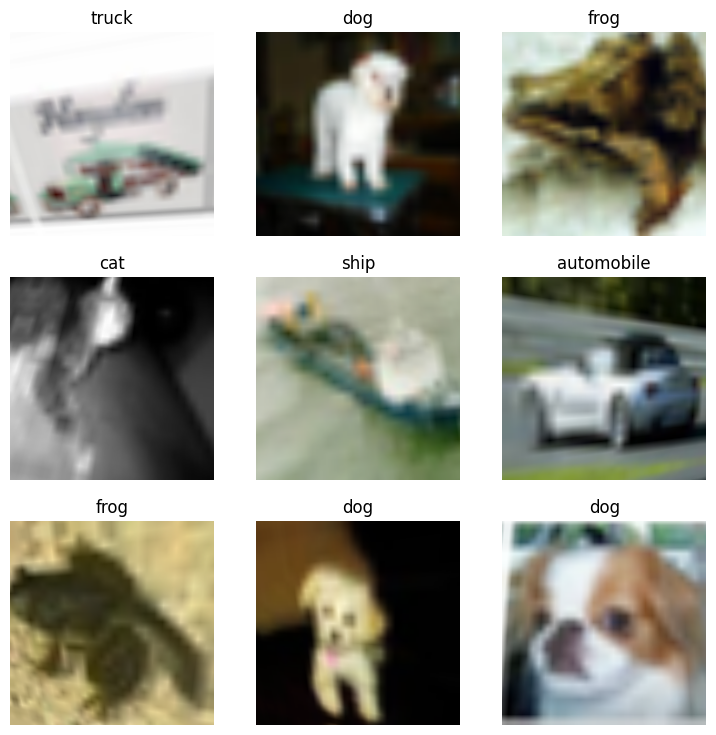

In [ ]:
dls = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test", item_tfms=Resize(224), bs=64, batch_tfms=batch_tfms)

dls.show_batch()

In [ ]:
# Training the model with resnet50 and MixUp
learn = vision_learner(dls, resnet101, metrics=accuracy, cbs=MixUp())
learn.load("./Resnet101_97.02")

In [ ]:
# Validate the model on the validation set and print accuracy
loss, accuracy_val = learn.validate()
print(f"Validation accuracy: {accuracy_val*100:.2f}%")

Validation accuracy: 97.02%


In [ ]:
from skimage.util import random_noise

# Gauss

In [ ]:
noise_factor = 0.01

In [ ]:
test_images_g = random_noise(test_images, mode="gaussian",clip=True)

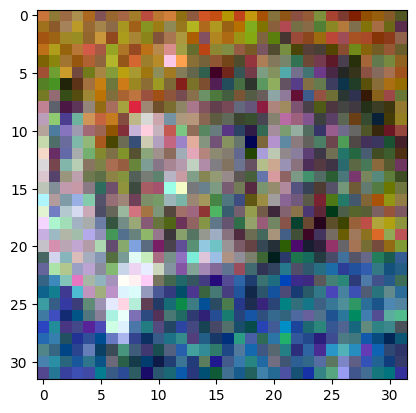

In [ ]:
plt.imshow(test_images_g[0])
plt.show()

In [ ]:
os.makedirs('./cifar10_dataset/test_g2', exist_ok=True)
for i in range(len(test_images)):
    label = label_names[test_labels[i][0]]
    os.makedirs(f'./cifar10_dataset/test_g2/{label}', exist_ok=True)
    image_filename = f'./cifar10_dataset/test_g2/{label}/{i}.png'
    keras.preprocessing.image.save_img(image_filename, test_images_g[i])

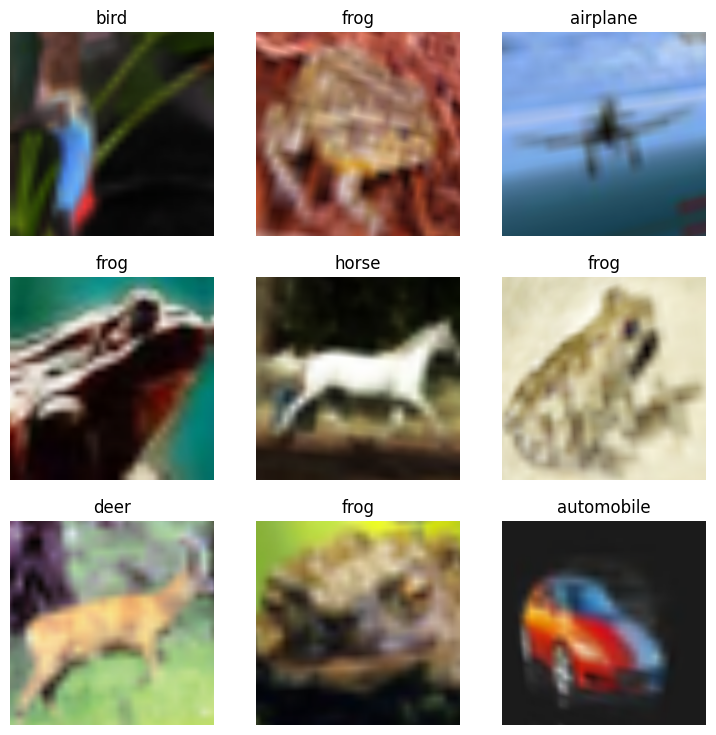

In [ ]:
dls2 = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test_g2", item_tfms=Resize(224), bs=64, batch_tfms=batch_tfms)
dls2.show_batch()

In [ ]:
# Training the model with resnet101 and MixUp
learn2 = vision_learner(dls2, resnet101, metrics=accuracy, cbs=MixUp())
learn2.load("./Resnet101_97.02")

In [ ]:
# Validate the model on the validation set and print accuracy
loss, accuracy_val = learn2.validate()
print(f"Validation accuracy: {accuracy_val*100:.2f}%")

Validation accuracy: 34.55%


# S&P

In [ ]:
test_images_sp = random_noise(test_images, mode="s&p",clip=True, amount=noise_factor)

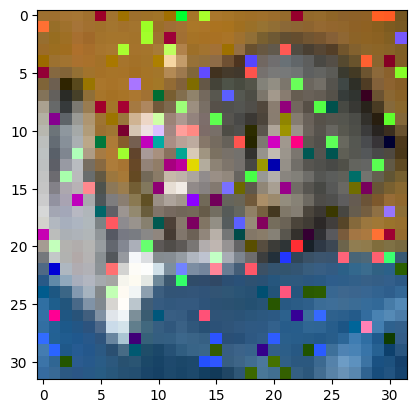

In [ ]:
plt.imshow(test_images_sp[0])
plt.show()

In [ ]:
os.makedirs('./cifar10_dataset/test_sp2', exist_ok=True)
for i in range(len(test_images)):
    label = label_names[test_labels[i][0]]
    os.makedirs(f'./cifar10_dataset/test_sp2/{label}', exist_ok=True)
    image_filename = f'./cifar10_dataset/test_sp2/{label}/{i}.png'
    keras.preprocessing.image.save_img(image_filename, test_images_sp[i])

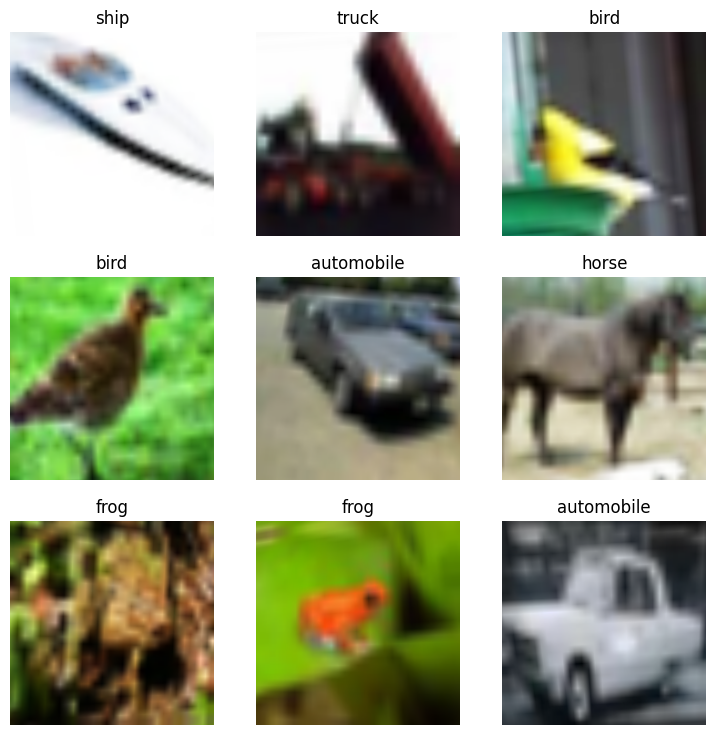

In [ ]:
dls2 = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test_sp2", item_tfms=Resize(224), bs=64, batch_tfms=batch_tfms)
dls2.show_batch()

In [ ]:
# Training the model with resnet101 and MixUp
learn2 = vision_learner(dls2, resnet101, metrics=accuracy, cbs=MixUp())
learn2.load("./Resnet101_97.02")

In [ ]:
# Validate the model on the validation set and print accuracy
loss, accuracy_val = learn2.validate()
print(f"Validation accuracy: {accuracy_val*100:.2f}%")

Validation accuracy: 35.83%


# Poisson

In [ ]:
test_images_p = random_noise(test_images, mode="poisson",clip=True)

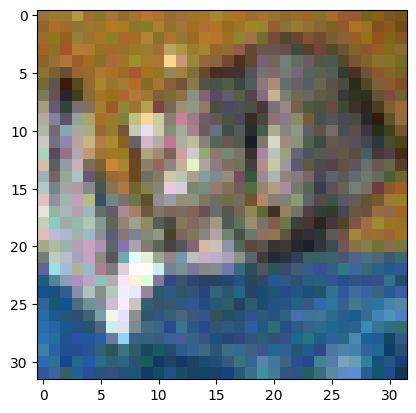

In [ ]:
plt.imshow(test_images_p[0])
plt.show()

In [ ]:
os.makedirs('./cifar10_dataset/test_p2', exist_ok=True)
for i in range(len(test_images)):
    label = label_names[test_labels[i][0]]
    os.makedirs(f'./cifar10_dataset/test_p2/{label}', exist_ok=True)
    image_filename = f'./cifar10_dataset/test_p2/{label}/{i}.png'
    keras.preprocessing.image.save_img(image_filename, test_images_p[i])

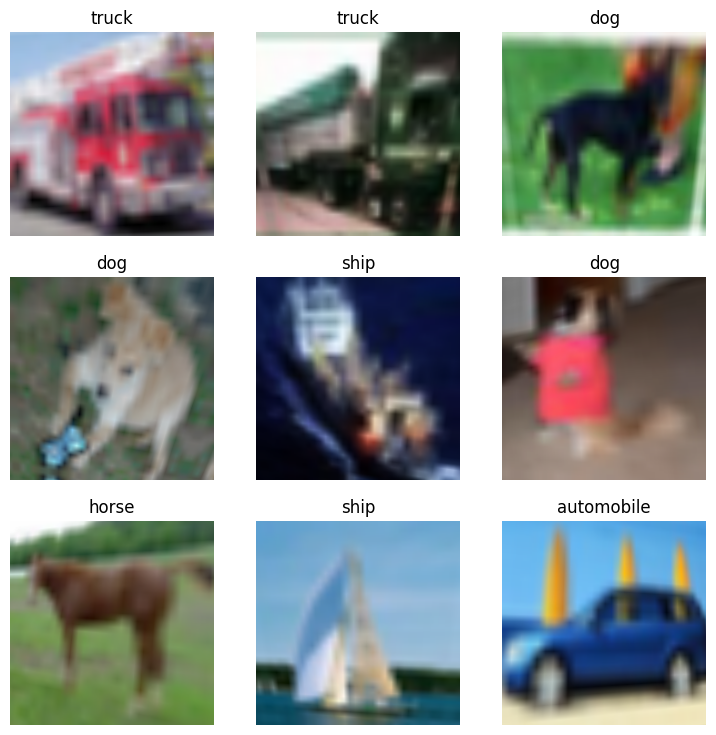

In [ ]:
dls2 = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test_p2", item_tfms=Resize(224), bs=64, batch_tfms=batch_tfms)
dls2.show_batch()

In [ ]:
# Training the model with resnet101 and MixUp
learn2 = vision_learner(dls2, resnet101, metrics=accuracy, cbs=MixUp())
learn2.load("./Resnet101_97.02")

In [ ]:
# Validate the model on the validation set and print accuracy
loss, accuracy_val = learn2.validate()
print(f"Validation accuracy: {accuracy_val*100:.2f}%")

Validation accuracy: 80.37%


#Speckle

In [ ]:
test_images_s = random_noise(test_images, mode="speckle",clip=True)

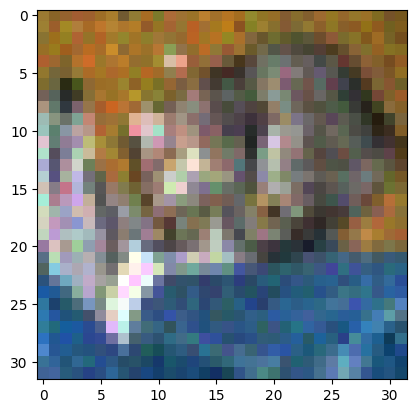

In [ ]:
plt.imshow(test_images_s[0])
plt.show()

In [ ]:
os.makedirs('./cifar10_dataset/test_s2', exist_ok=True)
for i in range(len(test_images)):
    label = label_names[test_labels[i][0]]
    os.makedirs(f'./cifar10_dataset/test_s2/{label}', exist_ok=True)
    image_filename = f'./cifar10_dataset/test_s2/{label}/{i}.png'
    keras.preprocessing.image.save_img(image_filename, test_images_s[i])

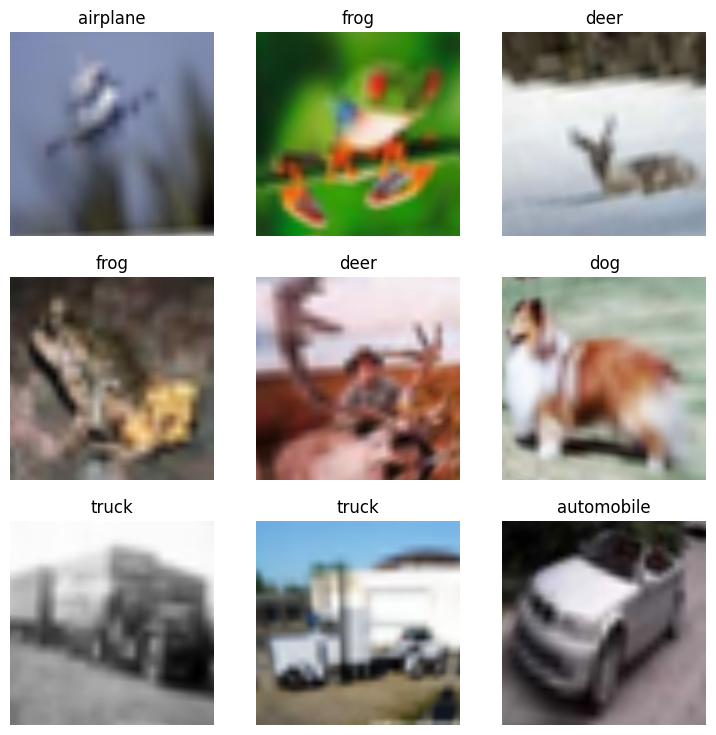

In [ ]:
dls2 = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test_s2", item_tfms=Resize(224), bs=64, batch_tfms=batch_tfms)
dls2.show_batch()

In [ ]:
# Training the model with resnet101 and MixUp
learn2 = vision_learner(dls2, resnet101, metrics=accuracy, cbs=MixUp())
learn2.load("./Resnet101_97.02")

In [ ]:
# Validate the model on the validation set and print accuracy
loss, accuracy_val = learn2.validate()
print(f"Validation accuracy: {accuracy_val*100:.2f}%")

Validation accuracy: 76.77%


# S&P variation

In [ ]:
noise = [0.005, 0.01, 0.02, 0.05, 0.1]

In [ ]:
def generate_graph(noise_f):
  test_images_sp = random_noise(test_images, mode="s&p",clip=True, amount=noise_f)
  os.makedirs('./cifar10_dataset/test_sp2', exist_ok=True)
  for i in range(len(test_images)):
      label = label_names[test_labels[i][0]]
      os.makedirs(f'./cifar10_dataset/test_sp2/{label}', exist_ok=True)
      image_filename = f'./cifar10_dataset/test_sp2/{label}/{i}.png'
      keras.preprocessing.image.save_img(image_filename, test_images_sp[i])
  dls2 = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test_sp2", item_tfms=Resize(224), bs=64, batch_tfms=batch_tfms)
  dls2.show_batch()
  # Training the model with resnet101 and MixUp
  learn2 = vision_learner(dls2, resnet101, metrics=accuracy, cbs=MixUp())
  learn2.load("./Resnet101_97.02")
  # Validate the model on the validation set and print accuracy
  loss, accuracy_val = learn2.validate()
  print(f"Validation accuracy: {accuracy_val*100:.2f}%")

  return loss, accuracy_val, test_images_sp[0]

0.005


Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:03<00:00, 54.2MB/s]


Validation accuracy: 90.09%
0.01


Validation accuracy: 79.72%
0.02


Validation accuracy: 64.03%
0.05


Validation accuracy: 36.01%
0.1


Validation accuracy: 15.50%


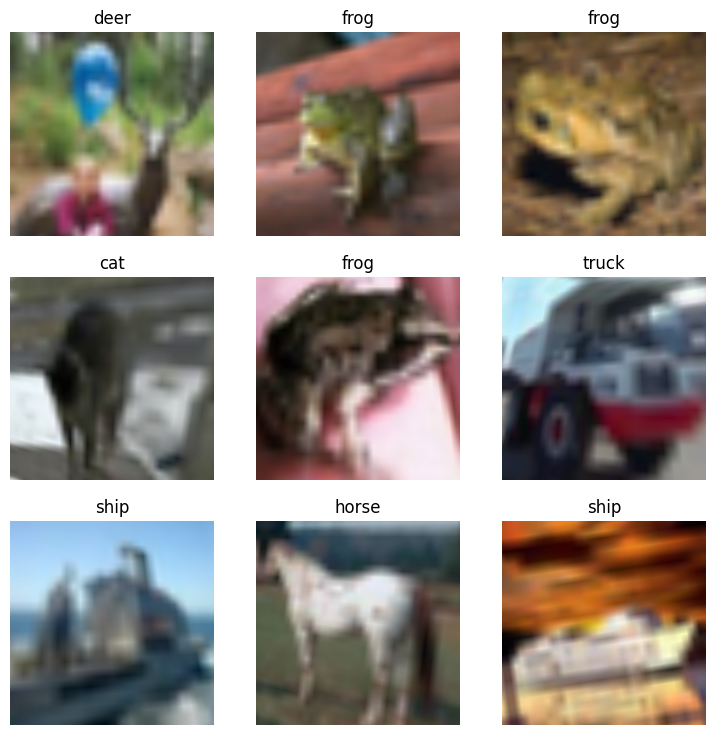

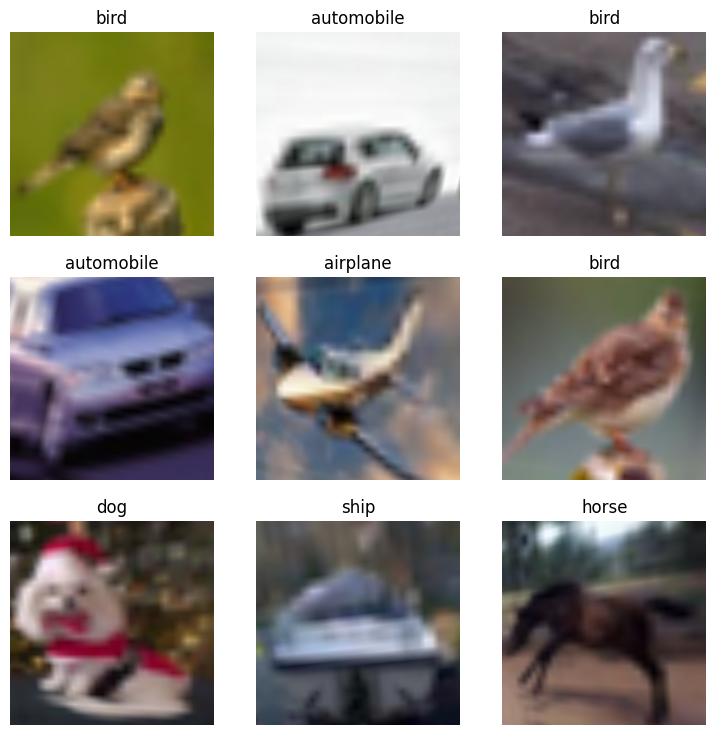

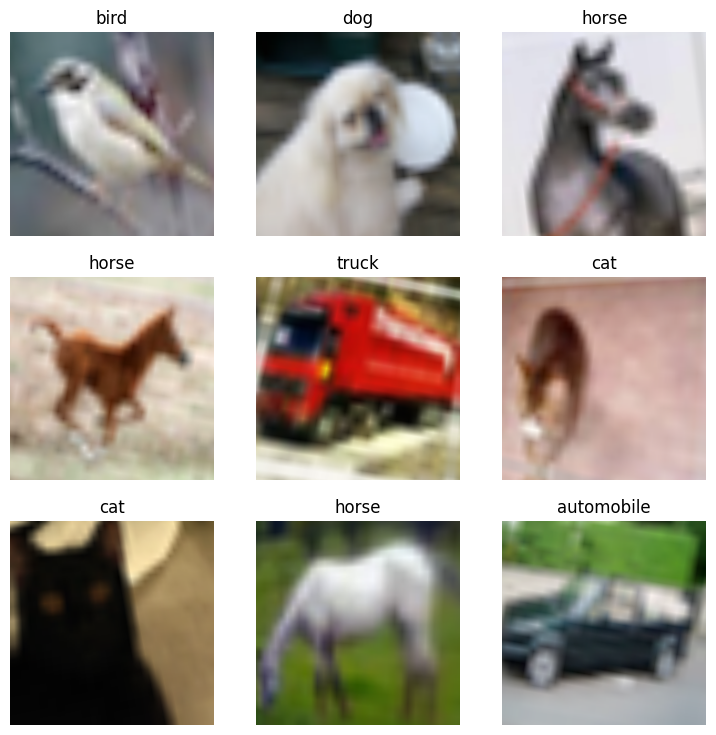

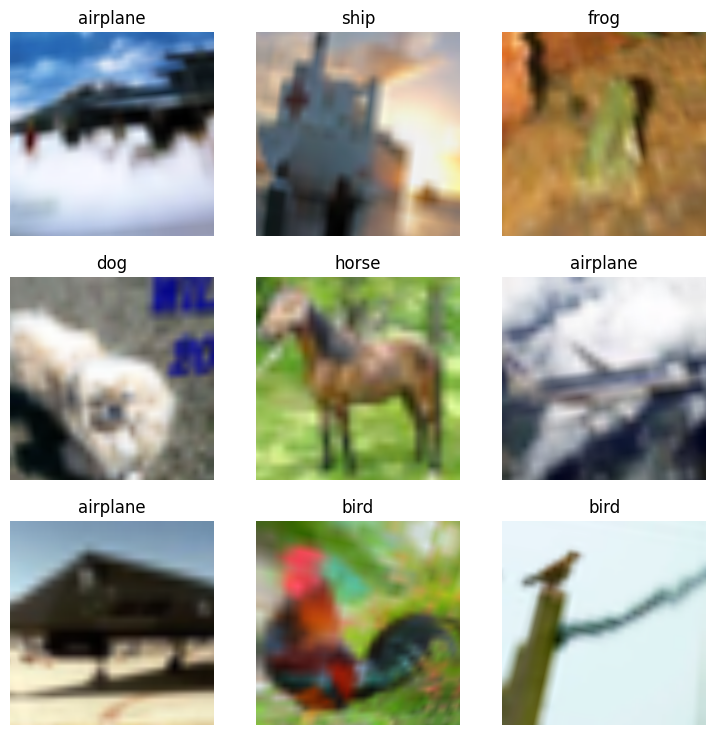

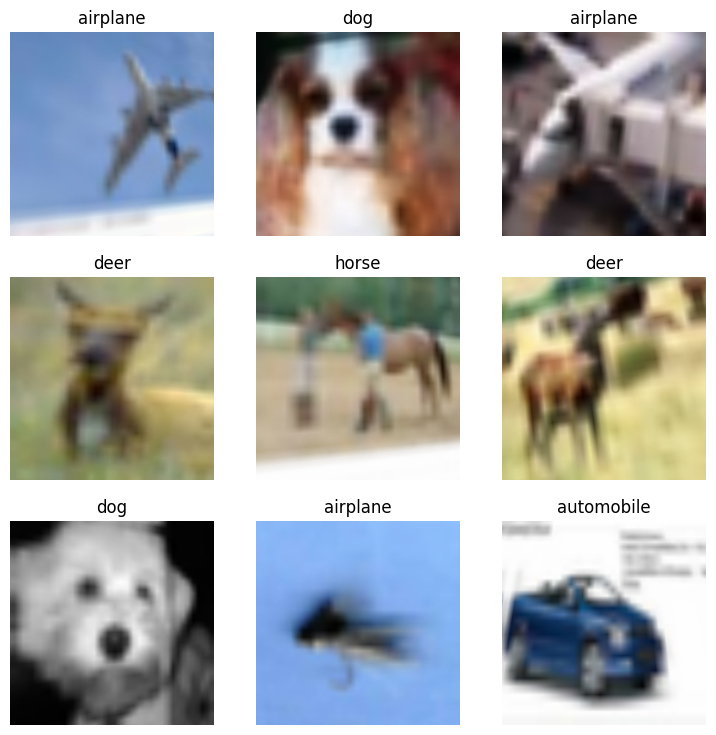

In [ ]:
loss_graph = []
accuracy_graph = []
images = []
for noise_f in noise:
  print(noise_f)
  loss, acc, img = generate_graph(noise_f)
  loss_graph.append(loss)
  accuracy_graph.append(acc)
  images.append(img)
  shutil.rmtree("./cifar10_dataset/test_sp2")
images_array = np.stack(images, axis=0)

In [ ]:
print(loss_graph)
print(accuracy_graph)
print(len(images))

[0.3198259174823761, 0.6567744016647339, 1.300697684288025, 2.4012463092803955, 3.462379217147827]
[0.9009000062942505, 0.7972000241279602, 0.6402999758720398, 0.36010000109672546, 0.1550000011920929]
5


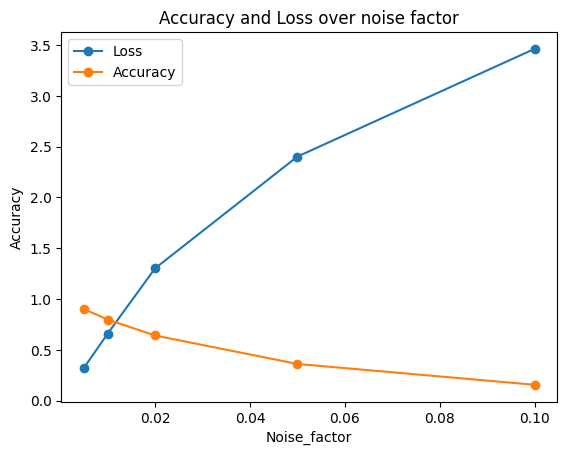

In [ ]:
plt.plot(noise, loss_graph, label='Loss', marker='o')

plt.plot(noise, accuracy_graph, label='Accuracy', marker='o')

# Adding labels and title
plt.xlabel('Noise_factor')
plt.ylabel('Accuracy')
plt.title('Accuracy and Loss over noise factor')
# Displaying the legend
plt.legend()

# Showing the plot
plt.show()

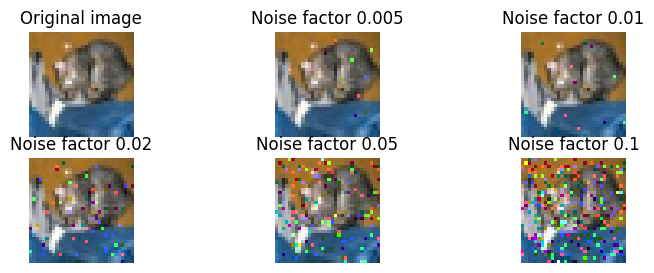

In [ ]:
# Plotting all 5 color images
fig, axes = plt.subplots(2, 3, figsize=(9, 3))

axes[0][0].imshow(test_images[0])
axes[0][0].axis('off')
axes[0][0].set_title(f'Original image')

for i in range(5):
    axes[(i+1)//3][(i+1)%3].imshow(images[i])
    axes[(i+1)//3][(i+1)%3].axis('off')
    axes[(i+1)//3][(i+1)%3].set_title(f'Noise factor {noise[i]}')

plt.show()

#hcaptcha

In [ ]:
!unzip hcaptcha-dataset-main.zip

In [ ]:
os.makedirs('./cifar10_dataset/test_captcha', exist_ok=True)

In [ ]:
!rm -rf './cifar10_dataset/test_captcha'

In [ ]:
!cp -R ./hcaptcha-dataset-main/airplane ./cifar10_dataset/test_captcha/
!cp -R ./hcaptcha-dataset-main/boat ./cifar10_dataset/test_captcha/
!cp -R ./hcaptcha-dataset-main/truck ./cifar10_dataset/test_captcha/
!mv ./cifar10_dataset/test_captcha/boat ./cifar10_dataset/test_captcha/ship

In [ ]:
!cp -R ./hcaptcha-dataset-main/boat ./cifar10_dataset/test_captcha/
!mv ./cifar10_dataset/test_captcha/boat ./cifar10_dataset/test_captcha/ship

In [ ]:
label_id = {
    'airplane':0,
    'ship':8,
    'truck':9,
}

In [ ]:
base_captcha = "./cifar10_dataset/test_captcha"

In [ ]:
image_data = []
label_data = []
for folder_name in os.listdir(base_captcha):
    folder_path = os.path.join(base_captcha, folder_name)
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Loop through each image in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                image_path = os.path.join(folder_path, filename)

                img = Image.open(image_path)
                img = img.resize((224,224), Image.ANTIALIAS)
                img_array = np.array(img)
                img_array = img_array.astype(np.float32) / 255.0
                # print(img_array.shape)
                # Append the image array to the list
                image_data.append(img_array)
                label_data.append(label_id[folder_name])

# Convert the list to a NumPy array
test_hcaptcha_base = np.array(image_data)
test_hcaptcha_labels = np.array(label_data)

<ipython-input-8-94eb78bb8284>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224,224), Image.ANTIALIAS)


In [ ]:
test_hcaptcha_base.shape

(1984, 224, 224, 3)

In [ ]:
hcaptcha_img = []
cur_img = test_hcaptcha_base[0]
for noise_f in noise:
  hcaptcha_img.append(random_noise(cur_img, mode="s&p",clip=True, amount=noise_f))
hcaptcha_img_array = np.stack(hcaptcha_img, axis=0)

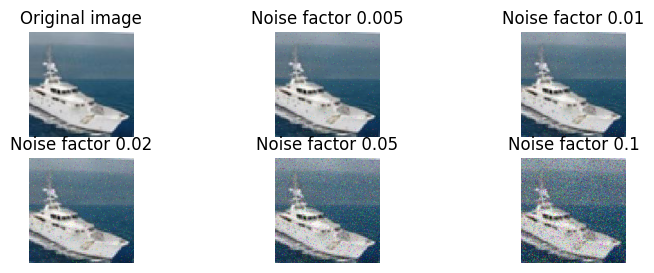

In [ ]:
# Plotting all 5 color images
fig, axes = plt.subplots(2, 3, figsize=(9, 3))

axes[0][0].imshow(test_hcaptcha_base[0])
axes[0][0].axis('off')
axes[0][0].set_title(f'Original image')

for i in range(5):
    axes[(i+1)//3][(i+1)%3].imshow(hcaptcha_img_array[i])
    axes[(i+1)//3][(i+1)%3].axis('off')
    axes[(i+1)//3][(i+1)%3].set_title(f'Noise factor {noise[i]}')

plt.show()

# hcaptcha test

In [ ]:
dls2 = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test_captcha", item_tfms=Resize(224), bs=64)

dls2.show_batch()

KeyboardInterrupt: ignored

In [ ]:
learn2 = vision_learner(dls2, resnet101, metrics=accuracy, cbs=MixUp())
learn2.load("./Resnet101_97.02")

In [ ]:
# Validate the model on the validation set and print accuracy
loss, accuracy_val = learn2.validate()
print(f"Validation accuracy: {accuracy_val*100:.2f}%")

Validation accuracy: 99.85%


# hcaptcha PPT

In [ ]:
noise = [0.005, 0.01, 0.02, 0.05, 0.1]

In [ ]:
test_hcaptcha_labels.resize(test_hcaptcha_labels.shape[0],1)

In [ ]:
def generate_graph_hcaptcha(noise_f):
  test_images_sp = random_noise(test_hcaptcha_base, mode="s&p",clip=True, amount=noise_f)
  os.makedirs('./cifar10_dataset/test_captcha_sp2', exist_ok=True)
  for i in range(len(test_hcaptcha_base)):
      label = label_names[test_hcaptcha_labels[i][0]]
      os.makedirs(f'./cifar10_dataset/test_captcha_sp2/{label}', exist_ok=True)
      image_filename = f'./cifar10_dataset/test_captcha_sp2/{label}/{i}.png'
      keras.preprocessing.image.save_img(image_filename, test_images_sp[i])
  dls2 = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test_captcha_sp2", item_tfms=Resize(224), bs=64, batch_tfms=batch_tfms)
  dls2.show_batch()
  # Training the model with resnet101 and MixUp
  learn2 = vision_learner(dls2, resnet101, metrics=accuracy, cbs=MixUp())
  learn2.load("./Resnet101_97.02")
  # Validate the model on the validation set and print accuracy
  loss, accuracy_val = learn2.validate()
  print(f"Validation accuracy: {accuracy_val*100:.2f}%")

  return loss, accuracy_val, test_images_sp[0]

In [ ]:
loss_graph = []
accuracy_graph = []
images = []
for noise_f in noise:
  print(noise_f)
  loss, acc, img = generate_graph_hcaptcha(noise_f)
  loss_graph.append(loss)
  accuracy_graph.append(acc)
  images.append(img)
  shutil.rmtree("./cifar10_dataset/test_captcha_sp2")
images_array = np.stack(images, axis=0)

0.005


Validation accuracy: 87.20%
0.01
